<a href="https://colab.research.google.com/github/mrahma15/MyRepos/blob/main/Homework_0_problem%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [2]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Google Colab data/Homework 0/snake.jpg')

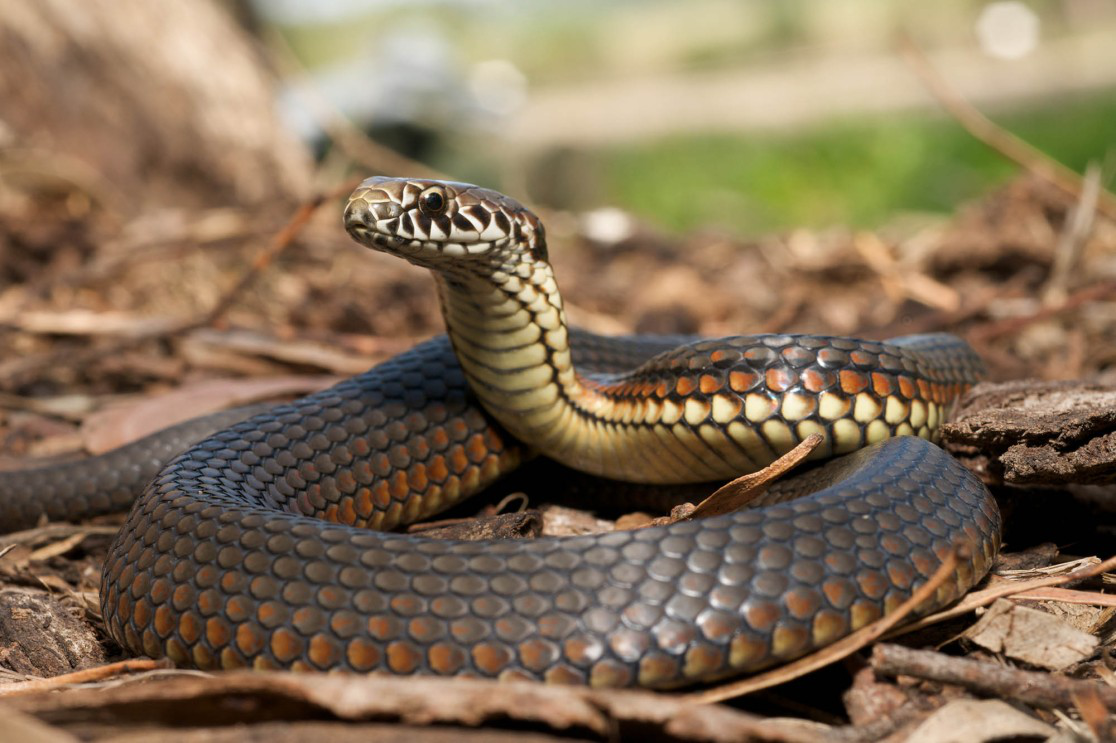

In [3]:
img

In [4]:
# sample execution (requires torchvision)
from torchvision import transforms
input_image = Image.open('/content/drive/MyDrive/Google Colab data/Homework 0/snake.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 2.2616e+00, -3.7967e-02, -8.4819e-01, -1.0823e+00, -1.9611e+00,
        -8.1073e-01, -1.0473e+00, -3.6668e-01, -2.0899e-01, -4.6783e-01,
        -1.9982e+00, -1.1562e+00, -3.5269e+00, -6.5365e+00, -4.5995e+00,
        -7.6427e-01, -4.3405e-01, -6.0880e-01, -1.4529e+00, -3.6984e+00,
        -1.5603e+00,  2.4849e+00, -2.9154e-01,  3.8144e-01, -2.8968e+00,
         2.8158e+00,  5.2488e+00,  7.2520e-01,  4.1004e+00, -3.1908e-01,
         2.0923e+00, -1.9022e+00,  2.1936e+00,  4.7215e+00,  6.3689e+00,
         5.2461e+00,  5.9081e+00,  3.1562e+00,  4.8289e+00,  3.9289e+00,
         7.3656e-01,  7.1817e+00,  4.4671e+00,  3.1329e+00,  8.2807e+00,
         4.8993e+00,  2.6820e+00,  5.9975e-01,  1.5959e+00,  5.2784e+00,
         4.8140e+00, -1.8159e-01,  1.5057e+01,  1.4891e+01,  1.1337e+01,
         8.5969e+00,  1.4835e+01,  1.4544e+01,  1.2475e+01,  1.0651e+01,
         1.4680e+01,  8.0755e+00,  1.1475e+01,  1.5195e+01,  1.0960e+01,
         9.7912e+00,  1.1935e+01,  1.0745e+01,  1.2

In [5]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-01-27 09:29:58--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-01-27 09:29:58 (80.1 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [6]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Indian cobra 0.21159517765045166
thunder snake 0.18431474268436432
ringneck snake 0.15611323714256287
king snake 0.1476873904466629
night snake 0.1264689713716507
